In [2]:
''' 
    Creation: 2021.09.12
    Last update: 2021.10.11

    User specific paths definition

'''
#Internal import 
import PVcharacterization_Utils as pv

data_folder = pv.assess_path_folders()
df_files_descp = pv.build_files_database(data_folder)

110 files was detected.
df_files_descp and the data base table PV_descp in C:\Users\franc\PVcharacterization_files\pv.db are built


In [3]:
''' Creation: 2021.09.19
    Last update: 2021.09.20
    
    df_meta dataframe building from selected files in database DATA_BASE_NAME
    
'''
import PVcharacterization_Utils as pv
df_meta = pv.build_metadata_dataframe(df_files_descp,data_folder)

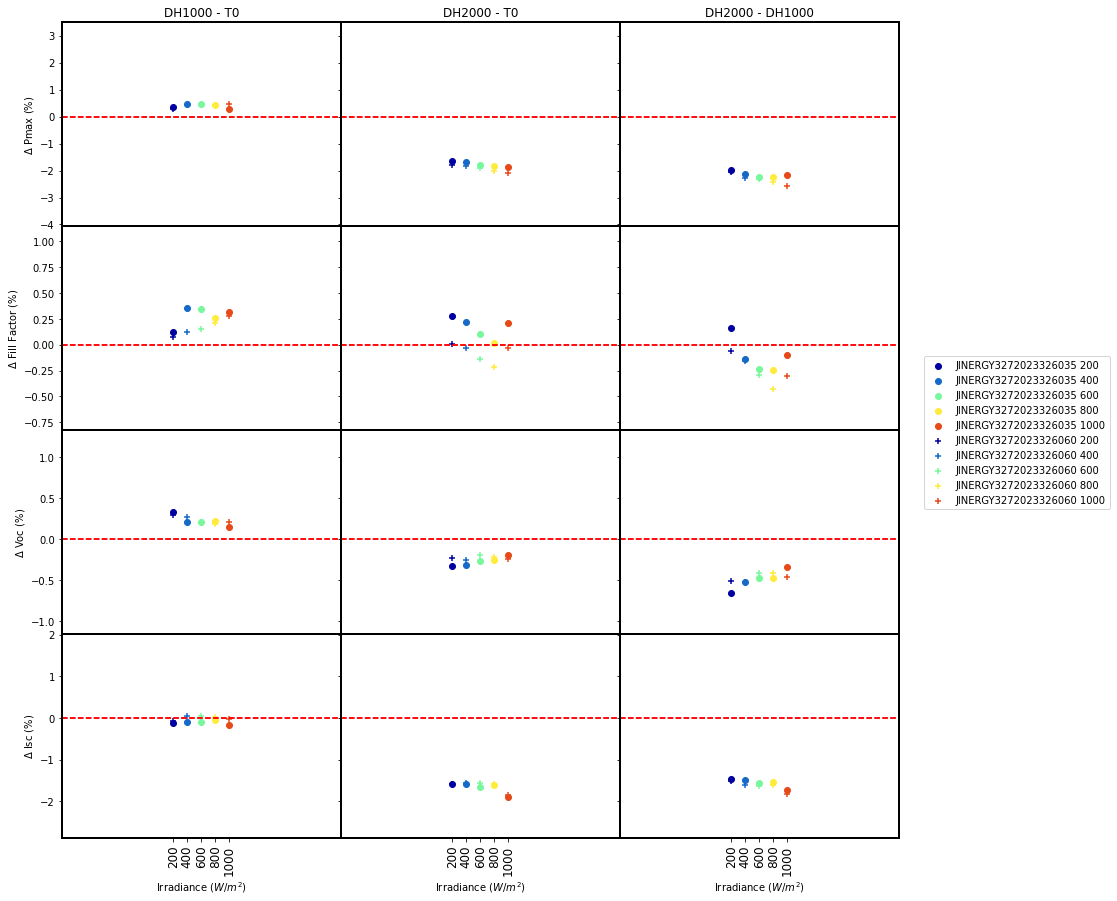

In [8]:

def init_plot_diff(df_meta):
    
    # Standard library imports
    from itertools import combinations

    #3rd party imports
    import pandas as pd

    mod_selected = df_meta['module_type'].unique()
    if len(mod_selected)>2: raise Exception("Sorry, the number of modules must be <=2 ") 
    list_setup = []
    name =[]
    if len(mod_selected)==2:
        for x in df_meta[['module_type','treatment','irradiance']].groupby('module_type'):
            name.append(x[0] )
            list_setup.append(set(zip(x[1]['treatment'].tolist(), x[1]['irradiance'].tolist())))
        if list_setup[1] - list_setup[0]:
            raise Exception(f'Cannot compare {name[0] } and {name[1]}')

    list_treatments = pd.unique(df_meta['treatment'])

    if len(list_treatments)==1: raise Exception("Sorry, the number of treatments must be >1 ") 

    list_combinations = list(combinations(list_treatments,2))

    list_diff = pv.Select_items(list_combinations,
                                'Select the difference',
                                mode = 'multiple')
    list_diff = [(x[1],x[0]) for x in list_diff]

    return list_diff

def plot_params_diff(df_meta,list_diff, list_params=None,dic_trt_meaning=None):
    
    #Internal import 
    import PVcharacterization_Utils as pv
    
    #3rd party imports
    import pandas as pd

    list_allowed_params = list(pv.USED_COLS)
    list_allowed_params.remove('Title')
    if list_params is None:
        list_params = pv.Select_items(list_allowed_params,
                                      'Select the params',
                                       mode = 'multiple')
    else:
        params_copy = list(list_params)
        unkown_params = set(params_copy).difference(set( list_allowed_params))
        for unknow_param in unkown_params:
            print(f'WARNING parameter {unknow_param} will be ignored')
            list_params.remove(unknow_param)

    list_modules = pd.unique(df_meta['module_type'])          # List of modules name (ID)
    pv.plot_params(list_params,
                   list_modules,
                   df_meta,list_diff = list_diff,
                   dic_trt_meaning=dic_trt_meaning) #None

''' Creation: 2021.10.09
    Last update: 2021.10.09
    
    Interactive choice of the treatment differences
    
    ''' 

list_diff = init_plot_diff(df_meta)

list_params = ['Pmax','Voc','Isc','Fill Factor','Rseries','bidon','trarmiz']
#list_diff = []
dic_trt_meaning=dic_trt_meaning= {'T0':'T0',
                'T1':'DH1000',
                'T2':'DH2000'}
plot_params_diff(df_meta,list_diff,None,dic_trt_meaning)


In [ ]:
''' Creation: 2021.09.19
    Last update: 2021.09.20
    
    Plotting of I/V curves.
    
    '''

# 3rd party import
import matplotlib.pyplot as plt

#Internal import 
import PVcharacterization_Utils as pv

irr_select = [1000]
name_select = ["JINERGY3272023326035",]
trt_select = ["T0","T1","T2"]

querries = pv.sieve_files(irr_select,trt_select,name_select,database_path)

for i, res in enumerate([pv.data_parsing(querry).IV0 for querry in querries]):
    plt.plot(res['Voltage'],res['Current'],label=trt_select[i])
    plt.scatter(res['Voltage'][::50],res['Current'][::50],s=10)
    plt.xlabel(res.columns[0] +'[V]')
    plt.ylabel(res.columns[1] +'[A]')
    plt.title(f'Irradiance: {str(irr_select[0])} {pv.PARAM_UNIT_DIC["IrrCorr"]}')
    
plt.legend()
plt.show()

    

In [ ]:
GEOMETRY_SELECT_DIR = "750x250"
def select_data_dir(root,title) :
 
    '''
    Selection of a folder
   
    Args:
        root (Path): initial folder.
        title (str): title specifying which kind of folder to be selected.
    Returns:
       (str): selected folder.
 
    '''
   
    # Standard library imports
    import os
    import tkinter as tk
    from tkinter import ttk
    from tkinter import filedialog
   
    global in_dir
   
    win= tk.Tk()
    win.geometry(GEOMETRY_SELECT_DIR )
    win.title("Folder selection")
    
    def select_file():
        global in_dir
        in_dir= filedialog.askdirectory(initialdir=str(root), title=title)
        tk.Label(win, text=in_dir, font=13).pack()
   
    tk.Label(win, text=title+'\nthen close the window', font=('Aerial 18 bold')).pack(pady=20)
    button= ttk.Button(win, text="Select", command= select_file)
    button.pack(ipadx=5, pady=15)
    if os.name == 'nt':
        tk.Button(win,
                  text="EXIT",
                  command=win.destroy).pack(pady=15)
        
    win.mainloop()
    return in_dir


In [ ]:
for _ in range(4):
    x = select_data_dir(r'c:\users\franc','essai')
